In [115]:
# ERP_visual
#!pip install cartopy
import cartopy.crs as ccrs # import projections
import cartopy.feature as cf # import features
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import seaborn as sns


### 处理经纬度数据

In [116]:
# 读取经纬度数据
nc_albroof = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_ALB_ROOF_1km_masked_gapfilled_QC.nc', mode='r')
lon = nc_albroof.variables['lon'][:]
lat = nc_albroof.variables['lat'][:]
# 找到经度和纬度对应的索引范围
lon_mask = (lon >= -2.8) & (lon <= -1.8)
lat_mask = (lat >= 53.3) & (lat <= 53.75)
# 把布尔索引转为具体位置索引
lon_idx = np.where(lon_mask)[0]
lat_idx = np.where(lat_mask)[0]

# 假设 albroof_subset 是二维数组，lon_indices 和 lat_indices 是索引数组
lon_Man = lon[lon_idx]
lat_Man = lat[lat_idx]
# pcolormesh期望纬度和经度为二维网格，如果是一维，需要用 meshgrid 扩展
lon_grid, lat_grid = np.meshgrid(lon_Man, lat_Man)


### 读取Manchester区域的数据

In [117]:
# 依次读取数据
# 打开nc文件
# nc_albroof = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_ALB_ROOF_1km_masked_gapfilled_QC.nc', mode='r')
nc_emroof = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_EM_ROOF_1km_masked_gapfilled_QC.nc', mode='r')
nc_albimproad = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_ALB_IMPROAD_1km_masked_gapfilled_QC.nc', mode='r')
nc_emimproad = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_EM_IMPROAD_1km_masked_gapfilled_QC.nc', mode='r')
nc_albperroad = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_ALB_PERROAD_1km_masked_gapfilled_QC.nc', mode='r')
nc_emperroad = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_EM_PERROAD_1km_masked_gapfilled_QC.nc', mode='r')
nc_albwall = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_ALB_WALL_1km_masked_gapfilled_QC.nc', mode='r')
nc_emwall = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_EM_WALL_1km_masked_gapfilled_QC.nc', mode='r')
nc_windhgtcanyon = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_WIND_HGT_CANYON_1km_masked_gapfilled_QC.nc', mode='r')
nc_htroof = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_HT_ROOF_1km_masked_gapfilled_QC.nc', mode='r')
nc_canyonhwr = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_CANYON_HWR_1km_masked_gapfilled_QC.nc', mode='r')
nc_wtlunitroof = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_WTLUNIT_ROOF_1km_masked_gapfilled_QC.nc', mode='r')
nc_wtroadperv = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_WTROAD_PERV_1km_masked_gapfilled_QC.nc', mode='r')

# 读取某个变量
albroof_Man = nc_albroof.variables['ALB_ROOF'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_albroof.close()
print('1')
emroof_Man = nc_emroof.variables['EM_ROOF'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_emroof.close()
print('2')
albimproad_Man = nc_albimproad.variables['ALB_IMPROAD'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_albimproad.close()
print('3')
emimproad_Man = nc_emimproad.variables['EM_IMPROAD'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_emimproad.close()
print('4')
albperroad_Man = nc_albperroad.variables['ALB_PERROAD'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_albperroad.close()
print('5')
emperroad_Man = nc_emperroad.variables['EM_PERROAD'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_emperroad.close()
print('6')
albwall_Man  = nc_albwall.variables['ALB_WALL'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_albwall.close()
print('7')
emwall_Man = nc_emwall.variables['EM_WALL'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_emwall.close()
print('8')
windhgtcanyon_Man = nc_windhgtcanyon.variables['WIND_HGT_CANYON'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_windhgtcanyon.close()
print('9')
htroof_Man = nc_htroof.variables['HT_ROOF'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_htroof.close()
print('10')
canyonhwr_Man = nc_canyonhwr.variables['CANYON_HWR'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_canyonhwr.close()
print('11')
wtlunitroof_Man = nc_wtlunitroof.variables['WTLUNIT_ROOF'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_wtlunitroof.close()
print('12')
wtroadperv_Man = nc_wtroadperv.variables['WTROAD_PERV'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_wtroadperv.close()
print('13')
# 关闭文件


1
2
3
4
5
6
7
8
9
10
11
12
13


### Manchester区域shp文件抠图

Index(['featurecla', 'scalerank', 'adm1_code', 'diss_me', 'iso_3166_2',
       'wikipedia', 'iso_a2', 'adm0_sr', 'name', 'name_alt',
       ...
       'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT', 'FCLASS_NL',
       'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'FCLASS_TLC', 'geometry'],
      dtype='object', length=122)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17548\838298616.py:25: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  manchester_polygon = gdf_combined.unary_union


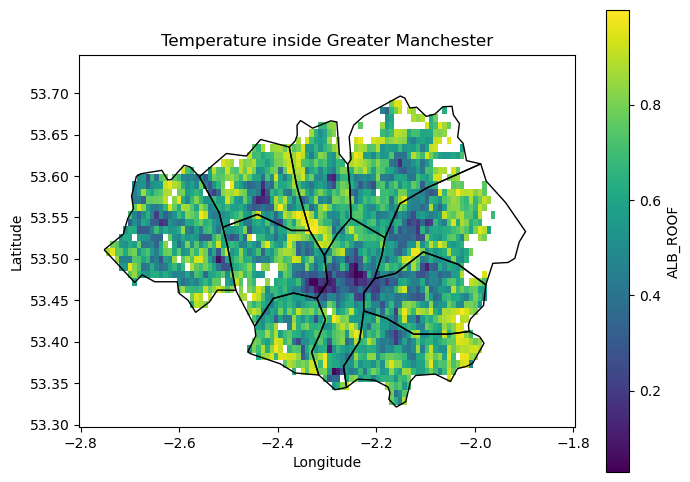

In [118]:
# 加载曼彻斯特shp文件
import geopandas as gpd
shapefile_path = "D:/A_sem2/ERP/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp"
gdf = gpd.read_file(shapefile_path)
print(gdf.columns)

# # 筛选英国Great Manchester的行政区划
g1 = gdf[(gdf['name'] == 'Manchester') & (gdf['iso_a2'] == 'GB')]  #
g2 = gdf[(gdf['name'] == 'Stockport') & (gdf['iso_a2'] == 'GB')]  #
g3 = gdf[(gdf['name'] == 'Wigan') & (gdf['iso_a2'] == 'GB')]  #
g4 = gdf[(gdf['name'] == 'Bolton') & (gdf['iso_a2'] == 'GB')]  #
g5 = gdf[(gdf['name'] == 'Salford') & (gdf['iso_a2'] == 'GB')]  #
g6 = gdf[(gdf['name'] == 'Trafford') & (gdf['iso_a2'] == 'GB')]  #
g7 = gdf[(gdf['name'] == 'Tameside') & (gdf['iso_a2'] == 'GB')]  #
g8 = gdf[(gdf['name'] == 'Oldham') & (gdf['iso_a2'] == 'GB')]  #
g9 = gdf[(gdf['name'] == 'Rochdale') & (gdf['iso_a2'] == 'GB')]  #
g10 = gdf[(gdf['name'] == 'Bury') & (gdf['iso_a2'] == 'GB')]  #

# 合并两个 GeoDataFrame，axis=0 表示按行合并
gdf_combined = gpd.GeoDataFrame(pd.concat([g1,g2,g3,g4,g5,g6,g7,g8,g9,g10], axis=0), crs=gdf.crs)

from shapely.geometry import Point

# 合并多边形成一个大多边形（Polygon 或 MultiPolygon）
manchester_polygon = gdf_combined.unary_union

# 定义一个函数
def mask_data_inside_polygon(lon_grid, lat_grid, data_array, polygon):
    """
    筛选二维栅格数据，只保留位于多边形内的点，轮廓外赋值为 np.nan。

    参数:
    - lon_grid: 2D numpy array，经度网格
    - lat_grid: 2D numpy array，纬度网格
    - data_array: 2D numpy array，与网格对应的数据
    - polygon: shapely Polygon 或 MultiPolygon 对象（多边形轮廓）

    返回:
    - filtered_data: 2D numpy array，只有多边形内数据，外部是 np.nan
    """
    # 将二维 lon/lat 网格扁平化，转换为 shapely 点列表
    points = [Point(x, y) for x, y in zip(lon_grid.flatten(), lat_grid.flatten())]
    # 判断每个点是否在多边形内，返回布尔数组
    mask = np.array([polygon.contains(pt) for pt in points])
    
    # 创建一个新数组，全填充 nan
    filtered_data = np.full(data_array.size, np.nan)
    
    # 只保留多边形内的数据
    filtered_data[mask] = data_array.flatten()[mask]
    
    # 恢复原二维形状
    filtered_data = filtered_data.reshape(data_array.shape)
    
    return filtered_data

# 浅试一下
filtered_data = mask_data_inside_polygon(lon_grid, lat_grid, wtroadperv_Man, manchester_polygon)
# 绘图，只显示多边形内数据，外面自动空白
plt.figure(figsize=(8,6))
plt.pcolormesh(lon_grid, lat_grid, filtered_data, shading='auto', cmap='viridis')
plt.colorbar(label='ALB_ROOF')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Temperature inside Greater Manchester')

# 叠加绘制边界线
gdf_combined.boundary.plot(ax=plt.gca(), edgecolor='black', linewidth=1)

plt.show()

In [119]:
# 将读取到的变量依次存放到featuers数据中
# 先确定每个二维数据的大小
height, width = albroof_Man.shape

# 你一共读取了几个变量？示例中13个左右，替换成你实际数量
num_features = 13

# 创建一个三维空数组，大小为 (feature数量, height, width)
features = np.empty((num_features, height, width), dtype=albroof_Man.dtype)

# 存放数据
features[0, :, :] = albroof_Man
features[1, :, :] = emroof_Man
features[2, :, :] = albimproad_Man
features[3, :, :] = emimproad_Man
features[4, :, :] = albperroad_Man
features[5, :, :] = emperroad_Man
features[6, :, :] = albwall_Man
features[7, :, :] = emwall_Man
features[8, :, :] = windhgtcanyon_Man
features[9, :, :] = htroof_Man
features[10, :, :] = canyonhwr_Man
features[11, :, :] = wtlunitroof_Man
features[12, :, :] = wtroadperv_Man 

print(features.shape)
display(emroof_Man[0,0])
display(features[:, 0, 0])

(13, 50, 112)


masked

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

### 使用klaML进行预测

In [120]:
# =============load model================
import pickle
automl = pickle.load(open('ERP_automl_model.pkl', 'rb'))


In [121]:
num_features, height, width = features.shape
# 转换 features 数据形状（假设每个网格点是一条样本）
# X = features.reshape(num_features, height * width).T  # 转成 (height*width, 13)
X_klaml = features.reshape(num_features, -1).T
print(X_klaml.shape)
y_pred_klaml = automl.predict(X_klaml)
y_pred_grid_klaml = y_pred_klaml.reshape(height, width)

(5600, 13)


In [122]:
# 对输入数据中的Nan值标注掩码，在模型预测完成后把这些位置替换成Nan
# 找出输入数据中有NaN的网格点（沿第0轴是13个特征层）
nan_mask = np.isnan(features).all(axis=0)  # (H, W), 只有该点13层全是NaN时才为True

# 预测数据 X_klaml 的准备和预测过程（假设你已有）
# X_klaml = features.reshape(...)  # 按实际代码做

y_pred_klaml = automl.predict(X_klaml)  # 预测输出(shape=(H*W,))
y_pred_grid_klaml = y_pred_klaml.reshape(height, width)

# 用掩码把对应位置设为NaN
y_pred_grid_klaml[nan_mask] = np.nan

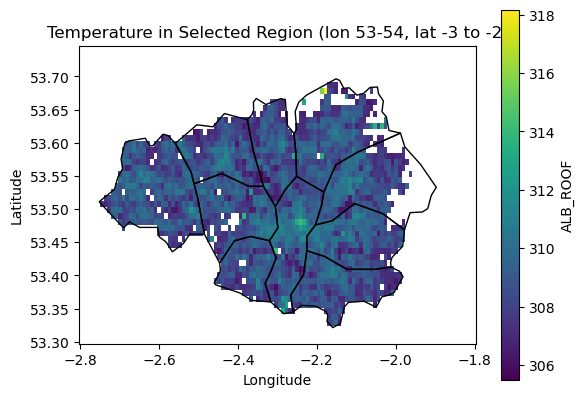

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [ ]:
# 绘图查看预测结果
# 绘制数据，设置合适的色图 cmap，根据需要调整
y_pred_grid_klaml_filtered= mask_data_inside_polygon(lon_grid, lat_grid, y_pred_grid_klaml, manchester_polygon)
plt.pcolormesh(lon_grid, lat_grid, y_pred_grid_klaml_filtered, shading='auto', cmap='viridis')

plt.colorbar(label='ALB_ROOF')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Temperature in Selected Region (lon 53-54, lat -3 to -2)')
gdf_combined.boundary.plot(ax=plt.gca(), edgecolor='black', linewidth=1)
plt.show()


### 使用MLP进行预测

In [125]:
# 定义MLP模型
import torch
import torch.nn as nn

class MLPRegressor(nn.Module):# 定义一个MLP模型，继承自nn.Module，PyTorch所有神经网络模块都从这里继承。
    def __init__(self, input_dim):# 初始化方法，接收模型输入特征维度input_dim。
        super().__init__() # 调用父类初始化，保证nn.Module正常工作。
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)   # 输出为1，单输出回归
        )
    def forward(self, x): # 定义网络的前向传播，输入x依次通过上述self.model层处理，得到输出。
        return self.model(x) # 这一步告诉PyTorch 的计算图怎么从输入到输出计算。
    
input_dim = 13
model = MLPRegressor(input_dim)
model.load_state_dict(torch.load("ERP_mlp_regressor.pth"))
model.eval()  # 设置为评估模式

MLPRegressor(
  (model): Sequential(
    (0): Linear(in_features=13, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [126]:
# 调用训练时的标准化基准
# The data catalogue is stored as a CSV file. Here we read it with pandas.
data_path1 = 'D:/A_sem2/ERP/Simulation/lhs_exps.csv' # Change this to the path of the data file on your system
data_path2 = 'D:/A_sem2/ERP/Code/TSA_max_min_mean.xlsx' # Change this to the path of the data file on your system

# Load the data
df1 = pd.read_csv(data_path1, index_col=0, parse_dates=True)
df1 = df1.drop(columns=['ALB_ROOF_DIF', 'ALB_IMPROAD_DIF', 'ALB_PERROAD_DIF', 'ALB_WALL_DIF'])
# display(df1)
df2 = pd.read_excel(data_path2, parse_dates=True)

# 1. 加载数据
df_input = df1.values  # 输入特征CSV
df_output = df2.iloc[:, 0].values  # 输出特征Excel，只有1列
# print(df_input)
# print(df_output)

# 2. 特征标准化
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(df_input)
scaler_y = StandardScaler()
df_output = df_output.reshape(-1,1)
y_scaled = scaler_y.fit_transform(df_output)


# 数据转换

# 转为二维
X_mlp = features.reshape(num_features, -1).T  # 转成 (height*width, 13)

# 标准化
X_mlp_scaled = scaler_X.transform(X_mlp)
# display(X_mlp_scaled[7])

# 转为张量
X_tensor_mlp = torch.from_numpy(X_mlp_scaled).float()
# display(X_tensor_mlp.shape)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17548\2844298932.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1 = pd.read_csv(data_path1, index_col=0, parse_dates=True)


In [127]:
# 预测
with torch.no_grad():
    y_pred_mlp_scaled = model(X_tensor_mlp).cpu().numpy()

y_pred_real_mlp = scaler_y.inverse_transform(y_pred_mlp_scaled)

# 将数据转为和经纬度对应的维度
y_pred_grid_mlp = y_pred_real_mlp.reshape(height, width)

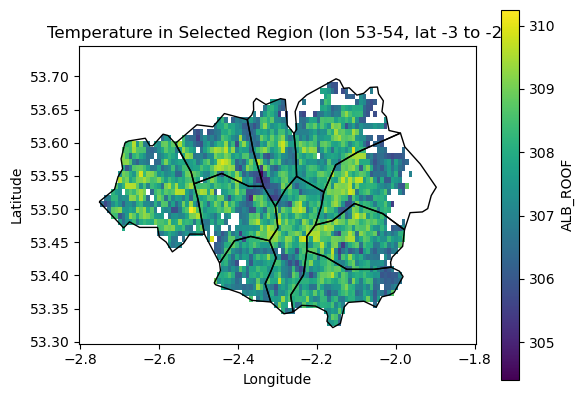

In [128]:
# 绘图查看预测结果
# 绘制数据，设置合适的色图 cmap，根据需要调整
y_pred_grid_mlp_filtered= mask_data_inside_polygon(lon_grid, lat_grid, y_pred_grid_mlp, manchester_polygon)
plt.pcolormesh(lon_grid, lat_grid, y_pred_grid_mlp_filtered, shading='auto', cmap='viridis')

plt.colorbar(label='ALB_ROOF')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Temperature in Selected Region (lon 53-54, lat -3 to -2)')
gdf_combined.boundary.plot(ax=plt.gca(), edgecolor='black', linewidth=1)
plt.show()

### 绘图比较两种模型的训练结果

305.49465997671655 318.1655763964397
304.40906 310.24652


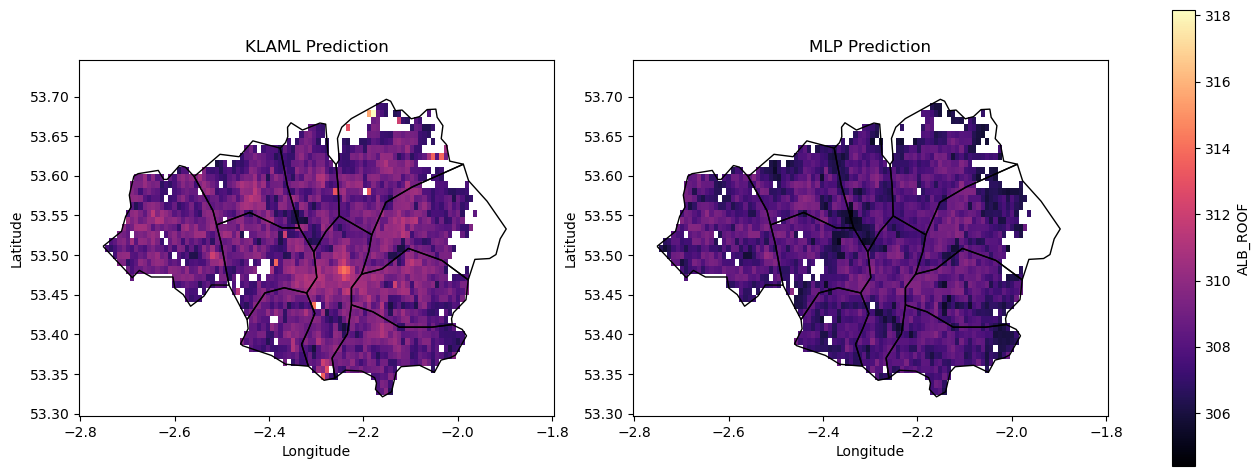

In [129]:
# klaml和mlp出图比较
vmin = min(np.nanmin(y_pred_grid_mlp), np.nanmin(y_pred_grid_klaml))
vmax = max(np.nanmax(y_pred_grid_mlp), np.nanmax(y_pred_grid_klaml))

print(np.nanmin(y_pred_grid_klaml),np.nanmax(y_pred_grid_klaml))
print(np.nanmin(y_pred_grid_mlp),np.nanmax(y_pred_grid_mlp))

fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1行2列子图
# KLAML绘图
# 绘制数据，设置合适的色图 cmap，根据需要调整
im1 = axes[0].pcolormesh(lon_grid, lat_grid, y_pred_grid_klaml_filtered, shading='auto', cmap='magma', vmin=vmin, vmax=vmax)
axes[0].set_title('KLAML Prediction')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
gdf_combined.boundary.plot(ax=axes[0], edgecolor='black', linewidth=1)
# MLP绘图
# 绘图查看预测结果
# 绘制数据，设置合适的色图 cmap，根据需要调整
im1 = axes[1].pcolormesh(lon_grid, lat_grid, y_pred_grid_mlp_filtered, shading='auto', cmap='magma', vmin=vmin, vmax=vmax)
axes[1].set_title('MLP Prediction')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')
gdf_combined.boundary.plot(ax=axes[1], edgecolor='black', linewidth=1)
# 调整子图间距
plt.tight_layout()

# 共用 colorbar，放在右侧
cbar = fig.colorbar(im1, ax=axes.ravel().tolist(), shrink=0.8)
cbar.set_label('ALB_ROOF')

plt.show()

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


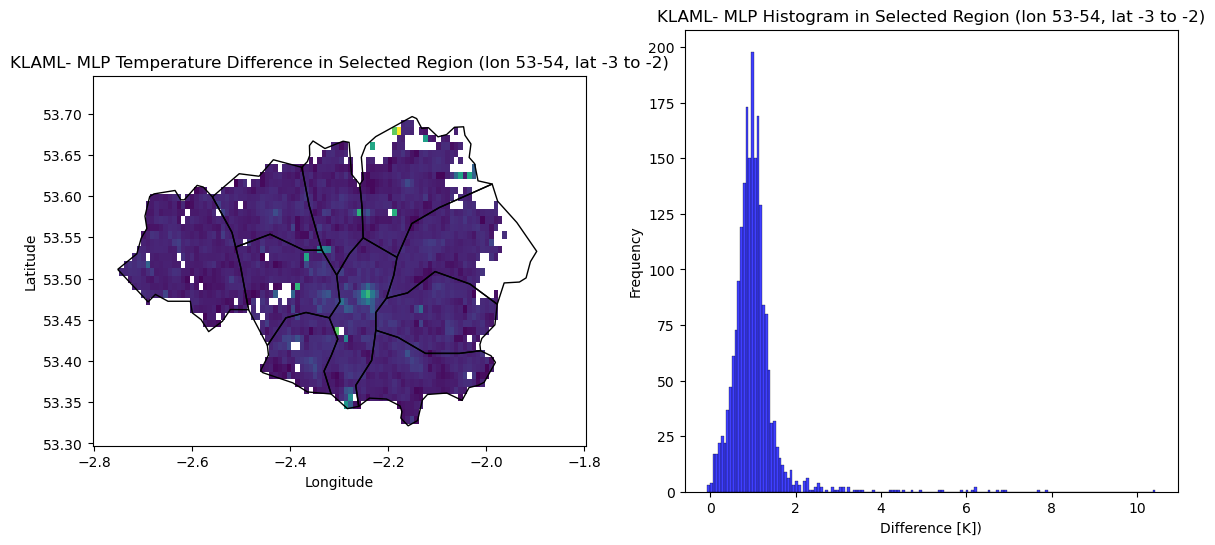

In [139]:
# klaml和mlp的difference 的网格色彩图
# 创建两列一行子图
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

diff = y_pred_grid_klaml_filtered - y_pred_grid_mlp_filtered
print(y_pred_grid_klaml_filtered)
im1 = axes[0].pcolormesh(lon_grid, lat_grid, diff, shading='auto', cmap='viridis')
axes[0].set_title('KLAML- MLP Temperature Difference in Selected Region (lon 53-54, lat -3 to -2)')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
gdf_combined.boundary.plot(ax=axes[0], edgecolor='black', linewidth=1)
# cbar = fig.colorbar(im1, ax=axes[0], label='Difference')

diff_flat = diff.flatten()
im2 = sns.histplot(diff_flat, color='blue', label='train', ax=axes[1])
axes[1].set_title('KLAML- MLP Histogram in Selected Region (lon 53-54, lat -3 to -2)')
axes[1].set_xlabel('Difference [K])')
axes[1].set_ylabel('Frequency')

plt.show()

### 对比两种模型对原始test数据的预测情况

(20000,)
(20000, 1)
(20000,)


<Axes: ylabel='Count'>

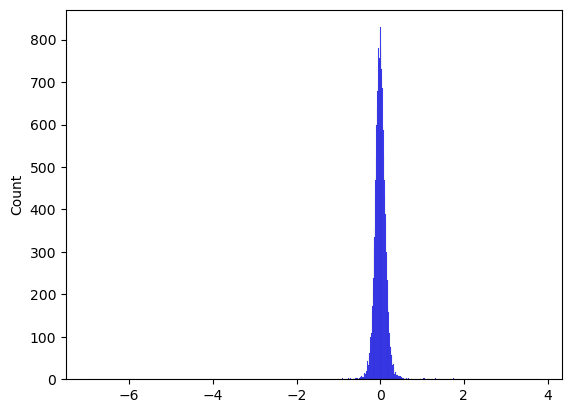

In [ ]:
# klaml_file
klaml_file = 'D:\\A_sem2\\ERP\\Code\\ERP_ds_test_klaml.nc'
ds_klaml = Dataset(klaml_file , 'r')
# 读取某个变量
ds_test_pre_klaml = ds_klaml.variables['y_pred'][:]  #
print(ds_test_pre_klaml.shape)
# 关闭文件
ds_klaml.close()

# mlp_file
mlp_file = 'D:\\A_sem2\\ERP\\Code\\ERP_ds_test_mlp.nc'
ds_mlp = Dataset(mlp_file , 'r')
# 读取某个变量
ds_test_pre_mlp = ds_mlp.variables['y_pred'][:]  #
print(ds_test_pre_mlp.shape)
# 关闭文件
ds_mlp.close()

# 转为一维向量
ds_test_pre_mlp = ds_test_pre_mlp.flatten()
# 绘制两者difference的概率密度图
test_pre_diff = ds_test_pre_klaml - ds_test_pre_mlp
test_pre_diff = test_pre_diff.flatten()
print(test_pre_diff.shape)
sns.histplot(test_pre_diff, color='blue', label='test_diff')


### 将预测的变量写为nc格式文件

In [ ]:
# 创建Dataset，给出坐标和数据变量的维度对应
ds_klaml = xr.Dataset(
    {
        "y_pred": (("lat", "lon"), y_pred_grid_klaml)# y_pred, y_pred_grid_mlp
    },
    coords = {
        "lon": lon_Man,
        "lat": lat_Man
    }
)

# 添加坐标变量的单位属性（可选）
ds_klaml.lon.attrs["units"] = "degrees_east"
ds_klaml.lat.attrs["units"] = "degrees_north"
ds_klaml.y_pred.attrs["units"] = "K"  # 这里假设y_pred是温度，单位开尔文，可以根据实际修改

# 写到NetCDF文件
ds_klaml.to_netcdf("ERP_y_pred_grid_klaml.nc")# ERP_y_pred_grid_mlp.nc

print("NetCDF 文件保存成功！")

In [ ]:
# 特征名称列表（必须和features的第一个维度长度对应）
feature_names = ["feat1", "feat2", "feat3", "feat4", "feat5", "feat6", "feat7",
                 "feat8", "feat9", "feat10", "feat11", "feat12", "feat13"]

ds_klaml = xr.Dataset(
    {
        "features": (("feature", "lat", "lon"), features)  # 三维数据，维度顺序对应数据形状
    },
    coords={
        "feature": feature_names,
        "lon": lon_Man,
        "lat": lat_Man
    }
)

# 添加单位属性（可选，根据实际情况改）
ds_klaml.lon.attrs["units"] = "degrees_east"
ds_klaml.lat.attrs["units"] = "degrees_north"
ds_klaml.feature.attrs["description"] = "Feature names"
ds_klaml.features.attrs["units"] = "K"  # 假设是温度，按需修改

# 写NetCDF文件
ds_klaml.to_netcdf("ERP_features_Man.nc")

print("NetCDF 文件保存成功！")